# 神经网络基础

## 激活函数

In [2]:
import torch
import matplotlib.pyplot as plt

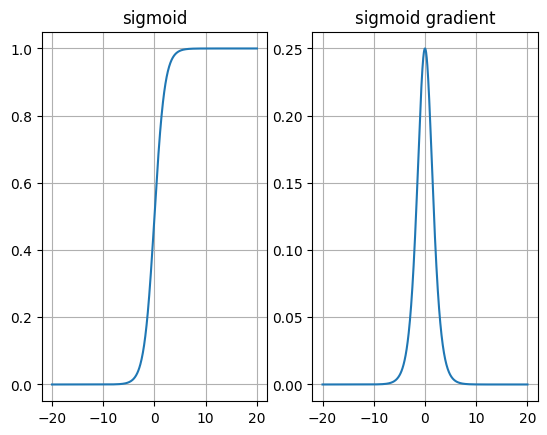

In [3]:
_,axes=plt.subplots(1,2)
x=torch.linspace(-20,20,1000)
y=torch.sigmoid(x)
axes[0].plot(x,y)
axes[0].set_title('sigmoid')
axes[0].grid()

x=torch.linspace(-20,20,1000,requires_grad=True)
y=torch.sigmoid(x).sum()  # 加法不影响互相的梯度
y.backward()
axes[1].plot(x.detach(),x.grad.reshape(-1))
axes[1].set_title('sigmoid gradient')
axes[1].grid()

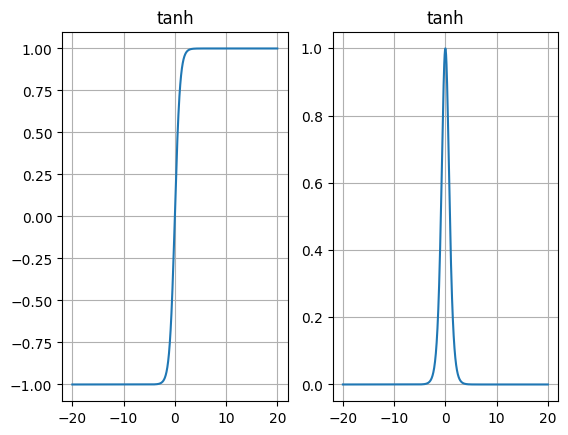

In [4]:
_,axes=plt.subplots(1,2)
x=torch.linspace(-20,20,1000)
y=torch.tanh(x)
axes[0].plot(x,y)
axes[0].set_title('tanh')
axes[0].grid()

x=torch.linspace(-20,20,1000,requires_grad=True)
y=torch.tanh(x).sum()  # 加法不影响互相的梯度
y.backward()
axes[1].plot(x.detach(),x.grad.reshape(-1))
axes[1].set_title('tanh')
axes[1].grid()

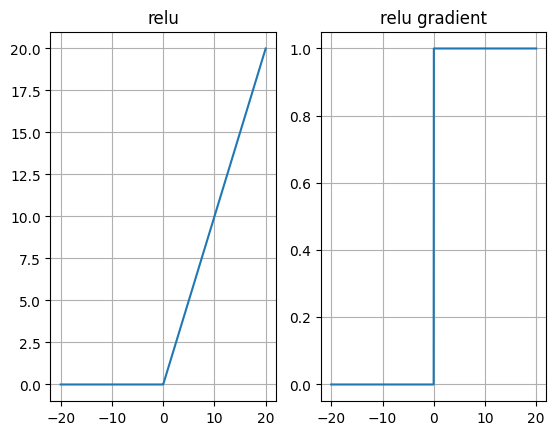

In [5]:
_, axes = plt.subplots(1, 2)
x = torch.linspace(-20, 20, 1000)
y = torch.relu(x)
axes[0].plot(x, y)
axes[0].set_title('relu')
axes[0].grid()

x = torch.linspace(-20, 20, 1000, requires_grad=True)
y = torch.relu(x).sum()  # 加法不影响互相的梯度
y.backward()
axes[1].plot(x.detach(), x.grad.reshape(-1))
axes[1].set_title('relu gradient')
axes[1].grid()

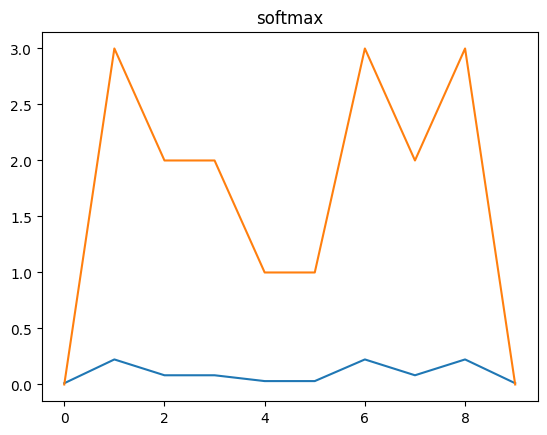

In [40]:
x=torch.linspace(0,9,10)

logits=torch.randint(0,4,[10]).float()
y=torch.softmax(logits,dim=0)

plt.plot(x,logits)
plt.plot(x,y)
plt.title('softmax')
plt.show()

## 初始化方法

In [ ]:
import torch   # 对 w b 初始化  正太 均匀 全0全1全均值
import torch.nn.functional as F
import torch.nn as  nn
def test01():
    linear=nn.Linear(5,3)
    nn.init.uniform_(linear.weight)
    print(linear.weight.data)
    
def test02():
    linear=nn.Linear(5,3)
    nn.init.constant_(linear.weight,5)
    print(linear.weight.data)
    
def test03():
    linear=nn.Linear(5,3)
    nn.init.normal_(linear.weight,mean=0,std=1)
    print(linear.weight.data)
    
def test04():
    linear=nn.Linear(5,3)
    nn.init.xavier_normal_(linear.weight)
    print(linear.weight.data)
    
def test05():
    linear=nn.Linear(5,3)
    nn.init.xavier_uniform_(linear.weight)
    print(linear.weight.data)
    
def test06():
    linear=nn.Linear(5,3)
    nn.init.kaiming_normal_(linear.weight)
    print(linear.weight.data)
    
def test07():
    linear=nn.Linear(5,3)
    nn.init.kaiming_uniform_(linear.weight)
    print(linear.weight.data)

# 神经网络搭建

In [42]:
# 神经网络搭建
# 一个继承，两个方法  init函数 forward方法定义前向传播的过程
# torch.nn 提供 损失函数和线性层    optim提供优化方法
import torch
import torch.nn as nn
from torchsummary import summary
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__() # 调用父类的初始化属性值
        self.linear1=nn.Linear(3,3)
        nn.init.xavier_normal_(self.linear1.weight)
        self.linear2=nn.Linear(3,2)
        nn.init.kaiming_normal_(self.linear2.weight)
        self.out=nn.Linear(2,2)
    def forward(self,x):
        x=self.linear1(x)
        x=torch.sigmoid(x)
        x=self.linear2(x)
        x=torch.relu(x)
        x=self.out(x)
        x=torch.softmax(x,dim=-1)
        return x

In [47]:
my_model=Model().to('cuda')
my_data=torch.randn(5,3).to('cuda')
print(my_data.shape)

output=my_model(my_data)
print(output.shape)

# summary查看参数量
summary(my_model,(3,),batch_size=1)

for name,parameter in my_model.named_parameters():
    print('name->',name,'\nvalue->',parameter)

torch.Size([5, 3])
torch.Size([5, 2])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                     [1, 3]              12
            Linear-2                     [1, 2]               8
            Linear-3                     [1, 2]               6
Total params: 26
Trainable params: 26
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
name-> linear1.weight 
value-> Parameter containing:
tensor([[ 0.0992, -0.4841,  0.5496],
        [ 0.2919,  0.7732, -0.2407],
        [ 0.1908, -0.0208,  0.8009]], device='cuda:0', requires_grad=True)
name-> linear1.bias 
value-> Parameter containing:
tensor([-0.4525, -0.4627,  0.0940], device='cuda:0', requires_grad=True)
name-> l

## 损失函数

In [ ]:
# 损失函数描述模型预测输出和真实值的差异

In [3]:
# 多分类交叉熵损失
import torch
from torch import nn
def test_cross_entropy():
    y_true=torch.tensor([1,2],dtype=torch.int64)  # 一维即可
    y_pred=torch.tensor([[0.2,0.6,0.2],[0.1,0.8,0.1]],dtype=torch.float32)
    loss=nn.CrossEntropyLoss()
    print(loss(y_pred,y_true).numpy())
test_cross_entropy()

1.1200755


In [13]:
def test_bce():
    y_true=torch.tensor([1,0],dtype=torch.float32)
    y_pred=torch.tensor([0.99,0.09],dtype=torch.float32)
    loss=nn.BCELoss()
    print(loss(y_pred,y_true).numpy())
test_bce()

0.05218052


In [14]:
def test_L1():
    y_true=torch.tensor([1,0],dtype=torch.float32)
    y_pred=torch.tensor([0.99,0.09],dtype=torch.float32)
    loss=nn.L1Loss()
    print(loss(y_pred,y_true).numpy())
test_L1()

0.049999997


In [15]:
def test_MSE():
    y_true=torch.tensor([1,0],dtype=torch.float32)
    y_pred=torch.tensor([0.99,0.09],dtype=torch.float32)
    loss=nn.MSELoss()
    print(loss(y_pred,y_true).numpy())
test_MSE()

0.0041


In [17]:
def test_SmoothL1Loss():
    y_true=torch.tensor([1,0],dtype=torch.float32)
    y_pred=torch.tensor([0.99,0.09],dtype=torch.float32)
    loss=nn.SmoothL1Loss()
    print(loss(y_pred,y_true).detach().numpy())
test_SmoothL1Loss()

# 共享数据，但是是独立的对象，有自己的元数据
# detach() 用于将张量在 PyTorch 中，detach() 用于从计算图中分离张量，返回一个新的张量，该张量与原始张量共享数据，但不再参与梯度计算。以下是其主要用途：

# 停止梯度计算：
# 
# 使用 detach() 后，该张量的操作不会被记录在计算图中，因此不会在反向传播时计算其梯度。
# x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
# y = x * 2
# z = y.detach()  # z 不再参与梯度计算
# loss = z.sum()
# loss.backward()  # 不会计算 y 的梯度
# 避免内存泄漏：
# 
# 分离中间结果可以减少计算图的内存占用，防止内存泄漏。
# x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
# y = x * 2
# z = y.detach()  # 分离 y，减少内存占用
# 数据共享：
# 
# detach() 返回的张量与原始张量共享数据，修改其中一个会影响另一个。
# x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
# y = x.detach()
# y[0] = 10.0
# print(x)  # 输出: tensor([10., 2., 3.], requires_grad=True)
# 模型评估：
# 
# 在模型评估时，使用 detach() 可以避免不必要的梯度计算，提升效率。
# model.eval()
# with torch.no_grad():
#     output = model(input).detach()  # 分离输出，不计算梯度
# 总结来说，detach() 主要用于停止梯度计算、减少内存占用、共享数据以及在模型评估时提升效率。

0.00205


## 网络优化方法

In [26]:
# 梯度下降法，梯度的反方向就是函数减小最快的方向   前向传播，反向传播（实现的必要步骤）
#wnew=wold-α*梯度

True
tensor([5., 3.], requires_grad=True)
tensor([5., 3.], requires_grad=True)


In [29]:
import torch 
from torch import nn
from torch import optim
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(2,2)
        self.linear2=nn.Linear(2,2)
        self.linear1.weight.data=torch.tensor([[0.15,0.20],[0.25,0.30]])
        self.linear2.weight.data=torch.tensor([[0.40,0.45],[0.50,0.55]])
        self.linear1.bias.data=torch.tensor([0.35,0.35])
        self.linear2.bias.data=torch.tensor([0.60,0.60])

    def forward(self,x):
        x=self.linear1(x)
        x=torch.sigmoid(x)
        x=self.linear2(x)
        x=torch.sigmoid(x)
        return x


In [30]:
inputs=torch.tensor([[0.05,0.10]])
target=torch.tensor([[0.01,0.99]])
model=Model()
output=model(inputs)
print(output)
loss=torch.sum((output-target)**2)/2
print(loss)
optimizer=optim.SGD(model.parameters(),lr=0.5)
optimizer.zero_grad()
loss.backward()
optimizer.step()
print(model.state_dict())

tensor([[0.7514, 0.7729]], grad_fn=<SigmoidBackward0>)
tensor(0.2984, grad_fn=<DivBackward0>)
OrderedDict([('linear1.weight', tensor([[0.1498, 0.1996],
        [0.2498, 0.2995]])), ('linear1.bias', tensor([0.3456, 0.3450])), ('linear2.weight', tensor([[0.3589, 0.4087],
        [0.5113, 0.5614]])), ('linear2.bias', tensor([0.5308, 0.6190]))])


In [ ]:
# 训练时遇到的问题
# 平缓，训练变慢
# 遇到鞍点，梯度为0，无法更新参数
# 遇到局部极小值，参数不是最优



#指数加权平均法

In [3]:
import torch
import matplotlib.pyplot as  plt
ElEMENT_NUMBER=30
def test_noewa():
    torch.random.manual_seed(0)
    temperature=torch.randn(ElEMENT_NUMBER)*10
    print(temperature.shape)
    days=torch.arange(1,ElEMENT_NUMBER+1,1)
    plt.plot(days,temperature,color='r')
    plt.scatter(days,temperature,color='b')
    plt.show()

torch.Size([30])


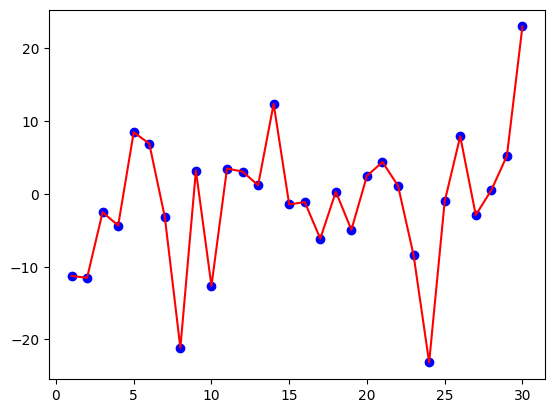

In [4]:
test_noewa()

In [10]:
def test_ewa():
    torch.manual_seed(0)
    temperature=torch.randn(ElEMENT_NUMBER)*10
    exp_weight_avg=[]
    for index,temp in enumerate(temperature):
        if index==0:
            exp_weight_avg.append(temp)
        else:
            exp_weight_avg.append(0.9*exp_weight_avg[-1]+0.1*temp)
    print(exp_weight_avg)
    days=torch.arange(1,ElEMENT_NUMBER+1,1)
    plt.plot(days,exp_weight_avg,color='r')
    plt.scatter(days,temperature,color='b')
    plt.show()

[tensor(-11.2584), tensor(-11.2849), tensor(-10.4070), tensor(-9.8002), tensor(-7.9715), tensor(-6.4823), tensor(-6.1501), tensor(-7.6503), tensor(-6.5630), tensor(-7.1700), tensor(-6.1030), tensor(-5.1846), tensor(-4.5463), tensor(-2.8540), tensor(-2.7121), tensor(-2.5525), tensor(-2.9108), tensor(-2.5881), tensor(-2.8220), tensor(-2.2914), tensor(-1.6226), tensor(-1.3479), tensor(-2.0542), tensor(-4.1648), tensor(-3.8506), tensor(-2.6731), tensor(-2.6955), tensor(-2.3734), tensor(-1.6132), tensor(0.8503)]


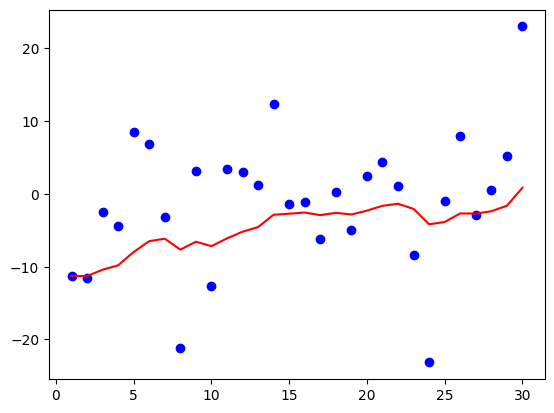

In [11]:
test_ewa() # 使得曲线更平滑，beta越大越平滑

In [ ]:
# Momentum
# 用指数加权平均法来更新梯度

In [2]:
# Adagrad 一种自适应学习率方法
import torch
import matplotlib.pyplot as plt
def test_adagrad():
    # 1.初始化权重参数
    w=torch.tensor([1.0],requires_grad=True,dtype=torch.float32)
    y=((w**2)/2.0).sum()
    # 实例化优化器，adagrad优化方法
    optimizer=torch.optim.Adagrad([w],lr=0.01)
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print("w.grad",w.grad.numpy(),"w",w.detach().numpy())
    
    y=((w**2)/2.0).sum()
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print("w.grad",w.grad.numpy(),"w",w.detach().numpy())

In [3]:
test_adagrad()

w.grad [1.] w [0.99]
w.grad [0.99] w [0.9829646]


In [4]:
# rmsprop 一种自适应学习率方法
import torch
import matplotlib.pyplot as plt
def test_rmsprop():
    # 1.初始化权重参数
    w=torch.tensor([1.0],requires_grad=True,dtype=torch.float32)
    y=((w**2)/2.0).sum()
    # 实例化优化器，rmsprop优化方法
    optimizer=torch.optim.RMSprop([w],lr=0.01,alpha=0.9)
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print("w.grad",w.grad.numpy(),"w",w.detach().numpy())
    
    y=((w**2)/2.0).sum()
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print("w.grad",w.grad.numpy(),"w",w.detach().numpy())

In [5]:
test_rmsprop()

w.grad [1.] w [0.96837723]
w.grad [0.96837723] w [0.945788]


In [6]:

import torch
import matplotlib.pyplot as plt
def test_adam():
    # 1.初始化权重参数
    w=torch.tensor([1.0],requires_grad=True,dtype=torch.float32)
    y=((w**2)/2.0).sum()
    # 实例化优化器，rmsprop优化方法
    optimizer=torch.optim.Adam([w],lr=0.01,betas=(0.9,0.99))
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print("w.grad",w.grad.numpy(),"w",w.detach().numpy())
    
    y=((w**2)/2.0).sum()
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print("w.grad",w.grad.numpy(),"w",w.detach().numpy())

In [7]:
test_adam()

w.grad [1.] w [0.99]
w.grad [0.99] w [0.9800025]


In [ ]:
# 学习率衰减方法
# 等间隔学习率衰减
lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=1,gamma=0.9)  # 调整间隔，调整系数，调整方式lr=lr*gamma

In [13]:
def test_StepLR():
    LR=0.1
    iteration=10
    max_epoch=200
    
    y_true=torch.tensor([0])
    x=torch.tensor([1.0])
    w=torch.tensor([1.0],requires_grad=True)
    
    optimizer=torch.optim.SGD([w],lr=LR)
    lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=50,gamma=0.5)
    
    lr_list,epoch_list=list(),list()
    
    for epoch in range(max_epoch):
        lr_list.append(lr_scheduler.get_last_lr())
        epoch_list.append(epoch)
        for i in range(iteration):
            loss=((w*x-y_true)**2)/2.0
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        lr_scheduler.step()
    plt.plot(epoch_list,lr_list,label="Step LR Scheduler")
    plt.xlabel("epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()

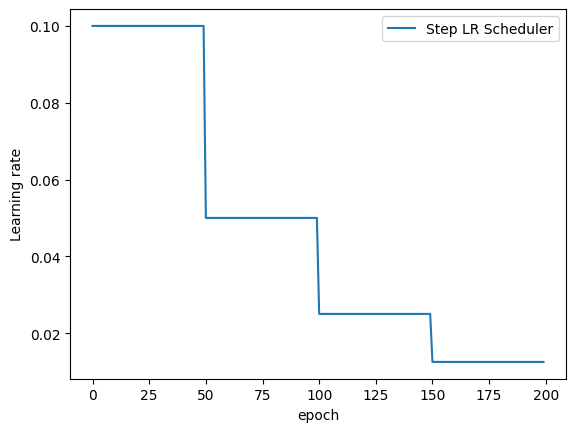

In [14]:
test_StepLR()

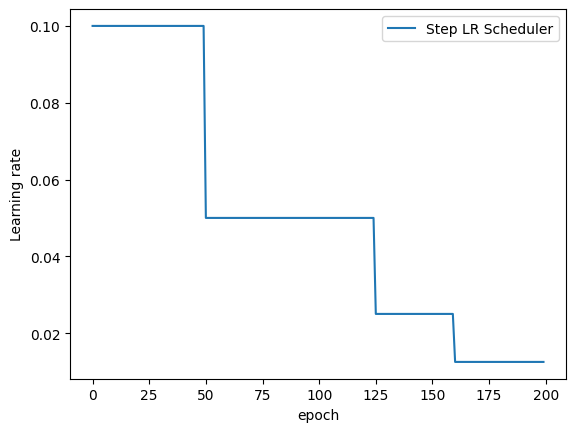

In [15]:
# 指定间隔学习率  指定具体轮次
def test_MultiStepLR():
    LR=0.1
    iteration=10
    max_epoch=200
    
    y_true=torch.tensor([0])
    x=torch.tensor([1.0])
    w=torch.tensor([1.0],requires_grad=True)
    
    milestones=[50,125,160]
    optimizer=torch.optim.SGD([w],lr=LR)
    lr_scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer,milestones=milestones,gamma=0.5)
    
    lr_list,epoch_list=list(),list()
    
    for epoch in range(max_epoch):
        lr_list.append(lr_scheduler.get_last_lr())
        epoch_list.append(epoch)
        for i in range(iteration):
            loss=((w*x-y_true)**2)/2.0
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        lr_scheduler.step()
    plt.plot(epoch_list,lr_list,label="Step LR Scheduler")
    plt.xlabel("epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()
test_MultiStepLR()

In [ ]:
# 指定间隔学习率  指定具体轮次
def test_MultiStepLR():
    LR=0.1
    iteration=10
    max_epoch=200
    
    y_true=torch.tensor([0])
    x=torch.tensor([1.0])
    w=torch.tensor([1.0],requires_grad=True)
    
    milestones=[50,125,160]
    optimizer=torch.optim.SGD([w],lr=LR)
    lr_scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer,milestones=milestones,gamma=0.5)
    
    lr_list,epoch_list=list(),list()
    
    for epoch in range(max_epoch):
        lr_list.append(lr_scheduler.get_last_lr())
        epoch_list.append(epoch)
        for i in range(iteration):
            loss=((w*x-y_true)**2)/2.0
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        lr_scheduler.step()
    plt.plot(epoch_list,lr_list,label="Step LR Scheduler")
    plt.xlabel("epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()
test_MultiStepLR()

In [ ]:
# 神经网络正则化方法

In [22]:
import torch.nn as nn
def test_dropout():
    dropout=nn.Dropout(p=0.4)
    inputs=torch.randint(0,10,size=(1,4)).float()
    layer=torch.nn.Linear(4,5)
    y=layer(inputs)
    print(y)
    y=dropout(y)
    print(y)
test_dropout()# 未变为0的按照1/(1-p)缩放 ，只在训练时有效果

tensor([[1.5235, 4.7309, 1.1547, 1.6378, 3.3082]], grad_fn=<AddmmBackward0>)
tensor([[0.0000, 7.8849, 1.9245, 2.7297, 5.5136]], grad_fn=<MulBackward0>)


In [ ]:
# 批量归一化